In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as mpatches

In [2]:
import os
os.chdir('..')

In [3]:
from config import mfp
import src.tools.chemidr.labeler as lbr
import src.tools.chemidr.id_map as id_map
from src.plot_utils import clean_plot
from src.data_loader import load_health

In [4]:
phenol_explorer = pd.read_excel(mfp('data/composition-data.xlsx'))

In [5]:
pe_garlic = phenol_explorer[phenol_explorer['food'].str.contains('Garlic')].copy()
pe_cocoa = phenol_explorer[phenol_explorer['food'].str.contains('Cocoa')].copy()

In [6]:
def id_loader(df, chem_key, load, file, fdb=True, pubchem=True):
    
    if load:
        df = pd.read_pickle(mfp(f'data/{file}'))
    else:
        df = lbr.id_searcher(df, chem_key, fdb=fdb, pubchem=pubchem)
        df.to_pickle(mfp(f'misc_save/{file}'))
    
    df.rename(columns={'pubchem_id' : 'chem_id_p', 'foodb_id' : 'chem_id_f'}, inplace=True)
    
    return df

# Saved ID's are loaded below
# pe_ids_g = id_loader(pe_garlic, 'compound', False, 'garlic_pe_ids.pkl')
# pe_ids_c = id_loader(pe_cocoa, 'compound', False, 'cocoa_pe_ids.pkl')
pe_ids_g = pd.read_pickle(mfp('misc_save/garlic_pe_ids.pkl'))
pe_ids_c = pd.read_pickle(mfp('misc_save/cocoa_pe_ids.pkl'))

In [7]:
garlic_fm = pd.read_pickle(mfp('misc_save/garlic_quant_fm.pkl'))
cocoa_fm = pd.read_pickle(mfp('misc_save/cocoa_quant_fm.pkl'))

Number of Phenol Explorer compounds in garlic and cocoa: 5 , 35


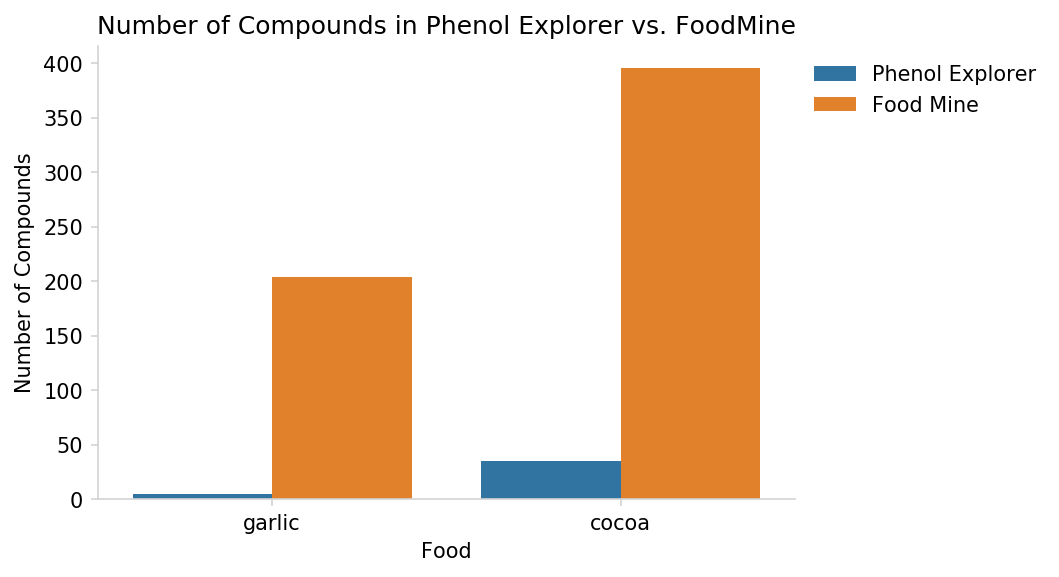

In [8]:
pe_distinct_ids_g = set(pe_ids_g['chem_id'].dropna().drop_duplicates().tolist())
pe_distinct_strings_g = set(pe_ids_g[pe_ids_g['chem_id'].isnull()]['compound'].drop_duplicates().tolist())
pe_distinct_ids_c = set(pe_ids_c['chem_id'].dropna().drop_duplicates().tolist())
pe_distinct_strings_c = set(pe_ids_c[pe_ids_c['chem_id'].isnull()]['compound'].drop_duplicates().tolist())

fm_distinct_ids_g = set(garlic_fm['chem_id'].dropna().drop_duplicates().tolist())
fm_distinct_strings_g = set(garlic_fm[garlic_fm['chem_id'].isnull()]['chemical'].drop_duplicates().tolist())
fm_distinct_ids_c = set(cocoa_fm['chem_id'].dropna().drop_duplicates().tolist())
fm_distinct_strings_c = set(cocoa_fm[cocoa_fm['chem_id'].isnull()]['chemical'].drop_duplicates().tolist())

num_measurements_pe_garlic = len(pe_distinct_ids_g) + len(pe_distinct_strings_g)
num_measurements_pe_cocoa = len(pe_distinct_ids_c) + len(pe_distinct_strings_c)

num_measurements_fm_garlic = len(fm_distinct_ids_g) + len(fm_distinct_strings_g)
num_measurements_fm_cocoa = len(fm_distinct_ids_c) + len(fm_distinct_strings_c)

print('Number of Phenol Explorer compounds in garlic and cocoa:', num_measurements_pe_garlic, ',', num_measurements_pe_cocoa)

viz = pd.DataFrame({
    'Number of Compounds' : [num_measurements_pe_garlic, num_measurements_pe_cocoa, num_measurements_fm_garlic, num_measurements_fm_cocoa],
    'Food' : ['garlic', 'cocoa', 'garlic', 'cocoa'],
    'Database' : ['Phenol Explorer', 'Phenol Explorer', 'Food Mine', 'Food Mine']
})


ax = sns.barplot(data=viz, x='Food', y='Number of Compounds', hue='Database')
ax.set_title('Number of Compounds in Phenol Explorer vs. FoodMine')
clean_plot()

In [9]:
num_overlap_garlic = len(pe_distinct_ids_g.intersection(fm_distinct_ids_g)) + len(pe_distinct_strings_g.intersection(fm_distinct_strings_g))
num_overlap_cocoa = len(pe_distinct_ids_c.intersection(fm_distinct_ids_c)) + len(pe_distinct_strings_c.intersection(fm_distinct_strings_c))

print('% of Phenol Explorer compounds in Garlic FoodMine:', (num_overlap_garlic/num_measurements_pe_garlic) * 100)
print('% of Phenol Explorer compounds in Cocoa FoodMine:', (num_overlap_cocoa/num_measurements_pe_cocoa) * 100)

% of Phenol Explorer compounds in Garlic FoodMine: 0.0
% of Phenol Explorer compounds in Cocoa FoodMine: 40.0


In [10]:
pe_papers_garlic = set([i.strip() for j in [str(p).split(';') for p in pe_garlic['pubmed_ids'].tolist()] for i in j])
pe_papers_cocoa = set([i.strip() for j in [str(p).split(';') for p in pe_cocoa['pubmed_ids'].tolist()] for i in j])

fm_papers_garlic = set([i for j in garlic_fm['papers'].tolist() for i in j])
fm_papers_cocoa = set([i for j in cocoa_fm['papers'].tolist() for i in j])

paper_overlap_g = pe_papers_garlic.intersection(fm_papers_garlic)
paper_overlap_c = pe_papers_cocoa.intersection(fm_papers_cocoa)

print("Number of papers in Phenol Explorere for garlic:", len(pe_papers_garlic))
print("Number of papers in Phenol Explorere for cocoa:", len(pe_papers_cocoa))
print('% of Phenol Explorer papers in Garlic FoodMine:', (len(paper_overlap_g)/len(pe_papers_garlic)) * 100)
print('% of Phenol Explorer papers in Cocoa FoodMine:', (len(paper_overlap_c)/len(pe_papers_cocoa)) * 100)

Number of papers in Phenol Explorere for garlic: 3
Number of papers in Phenol Explorere for cocoa: 8
% of Phenol Explorer papers in Garlic FoodMine: 0.0
% of Phenol Explorer papers in Cocoa FoodMine: 0.0


In [11]:
num_overlap_cocoa

14

# Phenol-Explorer in CTD

In [15]:
health = load_health().reset_index()
health = health[health['ChemicalName'] > 0]

C:\software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [20]:
health_pids = set(health['pubchem_id'].dropna().apply(int).tolist())

pe_garlic_pids = set(pe_ids_g['pubchem_id'].dropna().apply(int).tolist())
pe_cocoa_pids = set(pe_ids_c['pubchem_id'].dropna().apply(int).tolist())
pe_ids_both = set(list(pe_garlic_pids) + list(pe_cocoa_pids))

print('Number of Phenol-Explorer compounds with annotated health effects in CTD (garlic):', len(health_pids.intersection(pe_garlic_pids)))
print('Number of Phenol-Explorer compounds with annotated health effects in CTD (cocoa):', len(health_pids.intersection(pe_cocoa_pids)))
print('% of Phenol-Explorer compounds with annotated health effects in CTD (both):', len(health_pids.intersection(pe_ids_both)) / len(pe_ids_both))


Number of Phenol-Explorer compounds with annotated health effects in CTD (garlic): 1
Number of Phenol-Explorer compounds with annotated health effects in CTD (cocoa): 15
% of Phenol-Explorer compounds with annotated health effects in CTD (both): 0.46875


In [21]:
usda = pd.read_pickle(mfp('misc_save/garlic_usda_conv.pkl')).rename(columns={'pubchem_id' : 'chem_id_p'})

In [22]:
len(set(usda.chem_id_p.dropna().apply(int).tolist()).intersection(health_pids))

55

In [23]:
def display_num_pe_papers(pe):
    all_ids = [i.strip() for j in pe['publication_ids'].tolist() for i in str(j).split(';')]
    PMIDs = [i.strip() for j in pe['pubmed_ids'].dropna().tolist() for i in str(j).split(';')]
    
    print('Number of publications:', len(set(all_ids)))
    print('Number of publications in Pubmed', len(set(PMIDs)))

In [24]:
display_num_pe_papers(pe_garlic)

Number of publications: 6
Number of publications in Pubmed 3


In [25]:
display_num_pe_papers(pe_cocoa)

Number of publications: 9
Number of publications in Pubmed 7


In [26]:
pe_garlic#.publication_ids.tolist()

,food_group,food_sub_group,food,experimental_method_group,compound_group,compound_sub_group,compound,units,mean,min,max,sd,n,N,nb_of_publications,publication_ids,pubmed_ids
4703,Seasonings,Herbs,"Garlic, fresh",Chromatography after hydrolysis,Lignans,Lignans,Lariciresinol,mg/100 g fresh weight,21.46250,0.05,28.6000,20.18790,2,4,2,898; 751,16898863; 15877880
4704,Seasonings,Herbs,"Garlic, fresh",Chromatography after hydrolysis,Lignans,Lignans,Matairesinol,mg/100 g fresh weight,0.00276,0.00,0.0048,0.00257,3,9,3,896; 898; 751,16898863; 15877880
4705,Seasonings,Herbs,"Garlic, fresh",Chromatography after hydrolysis,Lignans,Lignans,Pinoresinol,mg/100 g fresh weight,15.12000,0.48,20.0000,13.80272,2,4,2,898; 751,16898863; 15877880
4706,Seasonings,Herbs,"Garlic, fresh",Chromatography after hydrolysis,Lignans,Lignans,Secoisolariciresinol,mg/100 g fresh weight,1.72111,0.04,5.0000,2.84933,3,9,3,896; 898; 751,16898863; 15877880
4707,Seasonings,Herbs,"Garlic, fresh",Folin assay,"Polyphenols, total","Polyphenols, total","Polyphenols, total",mg/100 g fresh weight,87.04333,47.66,149.8000,52.06322,3,6,3,401; 403; 344,15788119
